In [122]:
# Start by importing necessary packages
import requests
import pandas as pd
from IPython.display import display
from io import StringIO
import networkx as nx
from collections import defaultdict
from dst import DstApi

# from dstapi import DstApi # The helper class

In [96]:
r = requests.get('https://api.statbank.dk/v1/tables', params={'lang': 'en'}).json()


In [130]:
l_i = []
variables = defaultdict(list)
for i, table in df_tables.iterrows():
    r = requests.get(
            "https://api.statbank.dk/v1" + "/tableinfo",
            params={"id": table["id"], "format": "JSON", "lang": "en"}
        ).json()
    for var in r["variables"]:
        if var["id"] not in variables:
            variables[var["id"]].append({var["id"]: var["values"]})
        else:
            set_list1 = [frozenset(d.items()) for d in var["values"]]
            set_list2 = [frozenset(d.items()) for d in variables[var["id"]][0][var["id"]]]

            if set(set_list1) == set(set_list2):
                pass
            else:
                variables[var["id"]].append({var["id"]: var["values"]})

    if i == 7:
        break

In [136]:
for k, v in variables.items():
    print(k, len(v))

OMRÅDE 1
KØN 2
ALDER 4
CIVILSTAND 1
Tid 8
FDAG 1
FMAANED 1
FODAAR 1
FODLAND 2
HOVEDDELE 1


In [141]:
variables["KØN"][0]

{'KØN': [{'id': 'TOT', 'text': 'Total'},
  {'id': '1', 'text': 'Men'},
  {'id': '2', 'text': 'Women'}]}

In [125]:
var["values"]

[{'id': '000', 'text': 'All Denmark'},
 {'id': '084', 'text': 'Region Hovedstaden'},
 {'id': '101', 'text': 'Copenhagen'},
 {'id': '147', 'text': 'Frederiksberg'},
 {'id': '155', 'text': 'Dragør'},
 {'id': '185', 'text': 'Tårnby'},
 {'id': '165', 'text': 'Albertslund'},
 {'id': '151', 'text': 'Ballerup'},
 {'id': '153', 'text': 'Brøndby'},
 {'id': '157', 'text': 'Gentofte'},
 {'id': '159', 'text': 'Gladsaxe'},
 {'id': '161', 'text': 'Glostrup'},
 {'id': '163', 'text': 'Herlev'},
 {'id': '167', 'text': 'Hvidovre'},
 {'id': '169', 'text': 'Høje-Taastrup'},
 {'id': '183', 'text': 'Ishøj'},
 {'id': '173', 'text': 'Lyngby-Taarbæk'},
 {'id': '175', 'text': 'Rødovre'},
 {'id': '187', 'text': 'Vallensbæk'},
 {'id': '201', 'text': 'Allerød'},
 {'id': '240', 'text': 'Egedal'},
 {'id': '210', 'text': 'Fredensborg'},
 {'id': '250', 'text': 'Frederikssund'},
 {'id': '190', 'text': 'Furesø'},
 {'id': '270', 'text': 'Gribskov'},
 {'id': '260', 'text': 'Halsnæs'},
 {'id': '217', 'text': 'Helsingør'},


In [129]:
variables[var["id"]][0][var["id"]]

[{'id': '000', 'text': 'All Denmark'},
 {'id': '084', 'text': 'Region Hovedstaden'},
 {'id': '101', 'text': 'Copenhagen'},
 {'id': '147', 'text': 'Frederiksberg'},
 {'id': '155', 'text': 'Dragør'},
 {'id': '185', 'text': 'Tårnby'},
 {'id': '165', 'text': 'Albertslund'},
 {'id': '151', 'text': 'Ballerup'},
 {'id': '153', 'text': 'Brøndby'},
 {'id': '157', 'text': 'Gentofte'},
 {'id': '159', 'text': 'Gladsaxe'},
 {'id': '161', 'text': 'Glostrup'},
 {'id': '163', 'text': 'Herlev'},
 {'id': '167', 'text': 'Hvidovre'},
 {'id': '169', 'text': 'Høje-Taastrup'},
 {'id': '183', 'text': 'Ishøj'},
 {'id': '173', 'text': 'Lyngby-Taarbæk'},
 {'id': '175', 'text': 'Rødovre'},
 {'id': '187', 'text': 'Vallensbæk'},
 {'id': '201', 'text': 'Allerød'},
 {'id': '240', 'text': 'Egedal'},
 {'id': '210', 'text': 'Fredensborg'},
 {'id': '250', 'text': 'Frederikssund'},
 {'id': '190', 'text': 'Furesø'},
 {'id': '270', 'text': 'Gribskov'},
 {'id': '260', 'text': 'Halsnæs'},
 {'id': '217', 'text': 'Helsingør'},


In [117]:
variables["OMRÅDE"]

[{'id': '000', 'text': 'All Denmark'},
 {'id': '084', 'text': 'Region Hovedstaden'},
 {'id': '101', 'text': 'Copenhagen'},
 {'id': '147', 'text': 'Frederiksberg'},
 {'id': '155', 'text': 'Dragør'},
 {'id': '185', 'text': 'Tårnby'},
 {'id': '165', 'text': 'Albertslund'},
 {'id': '151', 'text': 'Ballerup'},
 {'id': '153', 'text': 'Brøndby'},
 {'id': '157', 'text': 'Gentofte'},
 {'id': '159', 'text': 'Gladsaxe'},
 {'id': '161', 'text': 'Glostrup'},
 {'id': '163', 'text': 'Herlev'},
 {'id': '167', 'text': 'Hvidovre'},
 {'id': '169', 'text': 'Høje-Taastrup'},
 {'id': '183', 'text': 'Ishøj'},
 {'id': '173', 'text': 'Lyngby-Taarbæk'},
 {'id': '175', 'text': 'Rødovre'},
 {'id': '187', 'text': 'Vallensbæk'},
 {'id': '201', 'text': 'Allerød'},
 {'id': '240', 'text': 'Egedal'},
 {'id': '210', 'text': 'Fredensborg'},
 {'id': '250', 'text': 'Frederikssund'},
 {'id': '190', 'text': 'Furesø'},
 {'id': '270', 'text': 'Gribskov'},
 {'id': '260', 'text': 'Halsnæs'},
 {'id': '217', 'text': 'Helsingør'},


In [110]:
l_i[1]

{'id': 'FOLK1AM',
 'text': 'Population at the first day of the month',
 'description': 'Population at the first day of the month by region, sex, age and time',
 'unit': 'Number',
 'suppressedDataValue': '0',
 'updated': '2023-09-08T08:00:00',
 'active': True,
 'contacts': [{'name': 'Dorthe Larsen',
   'phone': '39173307',
   'mail': 'dla@dst.dk'}],
 'documentation': {'id': '4a12721d-a8b0-4bde-82d7-1d1c6f319de3',
  'url': 'https://www.dst.dk/documentationofstatistics/4a12721d-a8b0-4bde-82d7-1d1c6f319de3'},
 'footnote': None,
 'variables': [{'id': 'OMRÅDE',
   'text': 'region',
   'elimination': True,
   'time': False,
   'map': 'denmark_municipality_07',
   'values': [{'id': '000', 'text': 'All Denmark'},
    {'id': '084', 'text': 'Region Hovedstaden'},
    {'id': '101', 'text': 'Copenhagen'},
    {'id': '147', 'text': 'Frederiksberg'},
    {'id': '155', 'text': 'Dragør'},
    {'id': '185', 'text': 'Tårnby'},
    {'id': '165', 'text': 'Albertslund'},
    {'id': '151', 'text': 'Ballerup'

In [67]:
        params = {
            "table": "FOLK1A",
            "format": "BULK",
            "lang": "en",
            "variables": ["region", "time"],
        }

In [70]:
r = requests.post("https://api.statbank.dk/v1/data", json=params)
#df = pd.read_csv(StringIO(r.text), sep=";", decimal=",")

In [71]:
params

{'table': 'FOLK1A',
 'format': 'BULK',
 'lang': 'en',
 'variables': ['region', 'time']}

In [66]:
df

,"{""errorTypeCode"":""EXTRACT-NOTALLOWED"",""message"":""Der skal vælges værdier for variabel: OMRÅDE""}"


In [158]:
subjects = requests.get('https://api.statbank.dk/v1/subjects', params={
   "includeTables": True,
   "recursive": True,
   "omitInactiveSubjects": True
}).json()


In [155]:
tables = r_subjects[0]["subjects"][1]["subjects"][0]["tables"]

In [156]:
tables = [t["id"] for t in tables]

In [175]:
subjects[0]

{'id': '1',
 'description': 'Borgere',
 'active': True,
 'hasSubjects': True,
 'subjects': [{'id': '3401',
   'description': 'Befolkning',
   'active': True,
   'hasSubjects': True,
   'subjects': [{'id': '20021',
     'description': 'Befolkningstal',
     'active': True,
     'hasSubjects': False,
     'subjects': [],
     'tables': [{'id': 'FOLK1A',
       'text': 'Folketal den 1. i kvartalet',
       'unit': 'Antal',
       'updated': '2023-08-11T08:00:00',
       'firstPeriod': '2008K1',
       'latestPeriod': '2023K3',
       'active': True,
       'variables': ['område', 'køn', 'alder', 'civilstand', 'tid']},
      {'id': 'FOLK1AM',
       'text': 'Folketal den 1. i måneden',
       'unit': 'Antal',
       'updated': '2023-09-08T08:00:00',
       'firstPeriod': '2021M10',
       'latestPeriod': '2023M08',
       'active': True,
       'variables': ['område', 'køn', 'alder', 'tid']},
      {'id': 'BEFOLK1',
       'text': 'Befolkningen 1. januar',
       'unit': 'Antal',
       'u

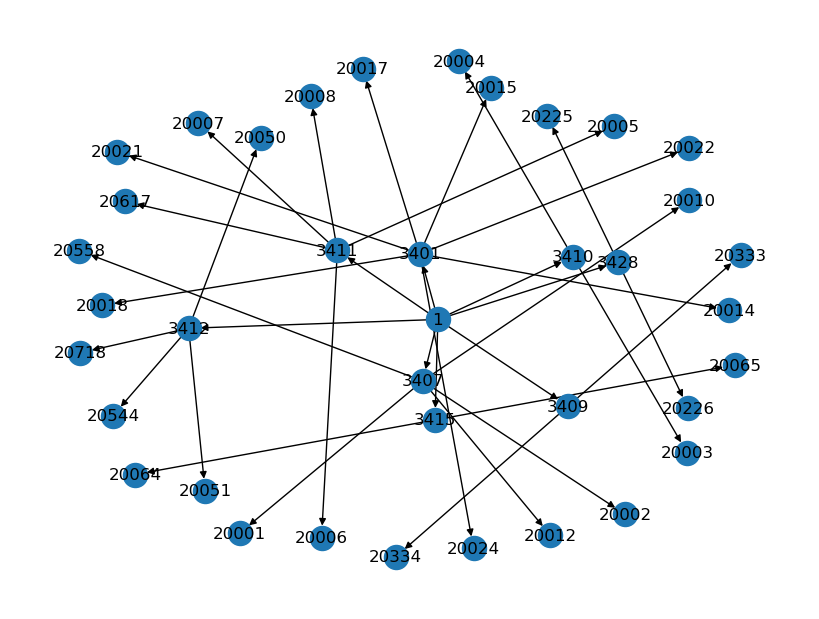

In [177]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True)
plt.show()


In [172]:
edge_df.head(20)

,source,target
0,1,3401
1,1,3407
2,1,3410
3,1,3415
4,1,3412
5,1,3411
6,1,3428
7,1,3409
8,3401,20021
9,3401,20024


In [179]:
edge_df

,source,target
0,1,3401
1,1,3407
2,1,3410
3,1,3415
4,1,3412
5,1,3411
6,1,3428
7,1,3409
8,3401,20021
9,3401,20024


In [180]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly

In [190]:
edge_df = pd.DataFrame(list(G.edges()), columns=['source', 'target'])

In [193]:
fig = go.Figure(
        go.Icicle(
            labels=edge_df["target"],
            parents=edge_df["source"],
            maxdepth=5,
        )
    )

In [194]:
fig.show()

In [195]:
edge_df

,source,target
0,1,3401
1,1,3407
2,1,3410
3,1,3415
4,1,3412
...,...,...
304,19,2482
305,2483,10392
306,2483,10393
307,2483,10394


In [178]:
import plotly.express as px

# Convert the networkx graph G to a pandas dataframe
edge_df = pd.DataFrame(list(G.edges()), columns=['source', 'target'])

# Plot the network with an icicle plot using plotly's icicle plot
fig = px.icicle(edge_df, path=['source', 'target'], maxdepth=5)

# Make the plot larger
fig.update_layout(height=800, width=1200)

fig.show()



In [73]:
table = DstApi('FOLK1A')

In [78]:
df = table.get_data()

/var/folders/g7/r0j91n2j1x33h34p5hc4vzcm0000gn/T/ipykernel_1480/921215899.py:1: UserWarning: API call parameters are not specified. Parameters resulting in the download of the entire table will be automatically generated. This can result in massive data downloads.
  df = table.get_data()


Execution aborted


In [94]:
r = requests.get(
            "https://api.statbank.dk/v1" + "/tableinfo",
            params={"id": "FOLK1A", "format": "JSON", "lang": "en"}
        ).json()

In [95]:
r

{'id': 'FOLK1A',
 'text': 'Population at the first day of the quarter',
 'description': 'Population at the first day of the quarter by region, sex, age, marital status and time',
 'unit': 'Number',
 'suppressedDataValue': '0',
 'updated': '2023-08-11T08:00:00',
 'active': True,
 'contacts': [{'name': 'Dorthe Larsen',
   'phone': '39173307',
   'mail': 'dla@dst.dk'}],
 'documentation': {'id': '4a12721d-a8b0-4bde-82d7-1d1c6f319de3',
  'url': 'https://www.dst.dk/documentationofstatistics/4a12721d-a8b0-4bde-82d7-1d1c6f319de3'},
 'footnote': None,
 'variables': [{'id': 'OMRÅDE',
   'text': 'region',
   'elimination': True,
   'time': False,
   'map': 'denmark_municipality_07',
   'values': [{'id': '000', 'text': 'All Denmark'},
    {'id': '084', 'text': 'Region Hovedstaden'},
    {'id': '101', 'text': 'Copenhagen'},
    {'id': '147', 'text': 'Frederiksberg'},
    {'id': '155', 'text': 'Dragør'},
    {'id': '185', 'text': 'Tårnby'},
    {'id': '165', 'text': 'Albertslund'},
    {'id': '151',

In [76]:
table.tablesummary(language='en')

Table FOLK1A: Population at the first day of the quarter by region, sex, age, marital status and time
Last update: 2023-08-11T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,OMRÅDE,105,000,All Denmark,851,Aalborg,False
1,KØN,3,TOT,Total,2,Women,False
2,ALDER,127,IALT,"Age, total",125,125 years,False
3,CIVILSTAND,5,TOT,Total,F,Divorced,False
4,Tid,63,2008K1,2008Q1,2023K3,2023Q3,True


In [43]:
def json_to_df_dict(list_):
    res = []
    for i in list_:
        if not i['subjects']:
            res.append({'id': i['id'], 'desc': i['description'], 'active': i['active'], 'hasSubjects': i['hasSubjects']})
        else:
            res.extend(json_to_df_dict(i['subjects']))
    return res
    # return DataFrame(json_to_df_dict(list_))

In [ ]:
r

In [44]:
t = json_to_df_dict(r_subjects)

In [49]:
for node in r_subjects:
    break

In [51]:
node.keys()

dict_keys(['id', 'description', 'active', 'hasSubjects', 'subjects', 'tables'])

In [57]:
node["subjects"]

[{'id': '3401',
  'description': 'Befolkning',
  'active': True,
  'hasSubjects': True,
  'subjects': [{'id': '20021',
    'description': 'Befolkningstal',
    'active': True,
    'hasSubjects': False,
    'subjects': [],
    'tables': [{'id': 'FOLK1A',
      'text': 'Folketal den 1. i kvartalet',
      'unit': 'Antal',
      'updated': '2023-08-11T08:00:00',
      'firstPeriod': '2008K1',
      'latestPeriod': '2023K3',
      'active': True,
      'variables': ['område', 'køn', 'alder', 'civilstand', 'tid']},
     {'id': 'FOLK1AM',
      'text': 'Folketal den 1. i måneden',
      'unit': 'Antal',
      'updated': '2023-09-08T08:00:00',
      'firstPeriod': '2021M10',
      'latestPeriod': '2023M08',
      'active': True,
      'variables': ['område', 'køn', 'alder', 'tid']},
     {'id': 'BEFOLK1',
      'text': 'Befolkningen 1. januar',
      'unit': 'Antal',
      'updated': '2023-03-01T08:00:00',
      'firstPeriod': '1971',
      'latestPeriod': '2023',
      'active': True,
      

In [ ]:
    name2id = dict(zip(df_h["entity"], df_h["id"]))
    G = nx.DiGraph()
    df = df_h[df_h["parent"].notna()].copy()
    # Add edges
    for i, row in df.iterrows():
        parent_id, child_id = name2id[row["parent"]], name2id[row["entity"]]
        G.add_edge(
            parent_id,
            child_id,
            title=row["name"],
            column=row["column"],
        )
    # Add node metadata
    for i, row in df.iterrows():
        _id = name2id[row["entity"]]
        G.nodes[_id].update(
            {"title": row["name"], "column": row["column"], "entity": row["entity"]}
        )


[{'id': '1',
  'description': 'Borgere',
  'active': True,
  'hasSubjects': True,
  'subjects': []},
 {'id': '2',
  'description': 'Arbejde og indkomst',
  'active': True,
  'hasSubjects': True,
  'subjects': []},
 {'id': '3',
  'description': 'Økonomi',
  'active': True,
  'hasSubjects': True,
  'subjects': []},
 {'id': '4',
  'description': 'Sociale forhold',
  'active': True,
  'hasSubjects': True,
  'subjects': []},
 {'id': '5',
  'description': 'Uddannelse og forskning',
  'active': True,
  'hasSubjects': True,
  'subjects': []},
 {'id': '6',
  'description': 'Erhvervsliv',
  'active': True,
  'hasSubjects': True,
  'subjects': []},
 {'id': '7',
  'description': 'Transport',
  'active': True,
  'hasSubjects': True,
  'subjects': []},
 {'id': '8',
  'description': 'Kultur og fritid',
  'active': True,
  'hasSubjects': True,
  'subjects': []},
 {'id': '9',
  'description': 'Miljø og energi',
  'active': True,
  'hasSubjects': True,
  'subjects': []},
 {'id': '19',
  'description': '

In [ ]:
https://api.statbank.dk/v1/tables